In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

filePath = "D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/casos_covid19.csv"

infectados = pd.read_csv(filePath, parse_dates=['fecha_clasificacion'])
#infectados.describe()
infectadosCABA = infectados[(infectados.provincia == "CABA") & (infectados.clasificacion == "confirmado")]

infectadosCABA.head()

C:\Users\Guti\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,5691075,29DEC2020:00:00:00.000000,29DEC2020:00:00:00.000000,18JAN2021:00:00:00.000000,CABA,RECOLETA,2.0,femenino,68.0,confirmado,NaN,NaN,NaN,Comunitario
1,5691704,29DEC2020:00:00:00.000000,28DEC2020:00:00:00.000000,19JAN2021:00:00:00.000000,CABA,NUEVA POMPEYA,4.0,masculino,56.0,confirmado,NaN,NaN,NaN,Comunitario
2,5693823,29DEC2020:00:00:00.000000,23DEC2020:00:00:00.000000,29DEC2020:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,40.0,confirmado,NaN,NaN,NaN,Comunitario
4,5695125,29DEC2020:00:00:00.000000,26DEC2020:00:00:00.000000,06JAN2021:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,52.0,confirmado,NaN,NaN,NaN,En Investigación
6,5696893,29DEC2020:00:00:00.000000,30DEC2020:00:00:00.000000,31DEC2020:00:00:00.000000,CABA,VELEZ SARSFIELD,10.0,masculino,79.0,confirmado,NaN,NaN,NaN,Comunitario


In [3]:
infectados.describe(include=object)

,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,genero,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
count,2457013,2449540,2457013,2446933,1398539,2457012,2457013,14184,14184,91701,660632
unique,455,515,510,24,48,2,3,432,1,450,5
top,08APR2021:00:00:00.000000,06APR2021:00:00:00.000000,07APR2021:00:00:00.000000,CABA,PALERMO,femenino,descartado,27APR2021:00:00:00.000000,si,13AUG2020:00:00:00.000000,Comunitario
freq,27626,22412,22208,1447067,122061,1273951,1753504,92,14184,733,486739


In [4]:
infectados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457013 entries, 0 to 2457012
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   numero_de_caso       int64  
 1   fecha_apertura_snvs  object 
 2   fecha_toma_muestra   object 
 3   fecha_clasificacion  object 
 4   provincia            object 
 5   barrio               object 
 6   comuna               float64
 7   genero               object 
 8   edad                 float64
 9   clasificacion        object 
 10  fecha_fallecimiento  object 
 11  fallecido            object 
 12  fecha_alta           object 
 13  tipo_contagio        object 
dtypes: float64(2), int64(1), object(11)
memory usage: 262.4+ MB


In [6]:
infectados.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
0,5691075,29DEC2020:00:00:00.000000,29DEC2020:00:00:00.000000,18JAN2021:00:00:00.000000,CABA,RECOLETA,2.0,femenino,68.0,confirmado,NaN,NaN,NaN,Comunitario
1,5691704,29DEC2020:00:00:00.000000,28DEC2020:00:00:00.000000,19JAN2021:00:00:00.000000,CABA,NUEVA POMPEYA,4.0,masculino,56.0,confirmado,NaN,NaN,NaN,Comunitario
2,5693823,29DEC2020:00:00:00.000000,23DEC2020:00:00:00.000000,29DEC2020:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,40.0,confirmado,NaN,NaN,NaN,Comunitario
3,5694086,29DEC2020:00:00:00.000000,26DEC2020:00:00:00.000000,05JAN2021:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,34.0,confirmado,NaN,NaN,NaN,Comunitario
4,5695125,29DEC2020:00:00:00.000000,26DEC2020:00:00:00.000000,06JAN2021:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,52.0,confirmado,NaN,NaN,NaN,En Investigación


In [26]:
pd.unique(infectados['provincia'])
pd.unique(infectados['clasificacion'])
#infectadosCABA = infectados.query('provincia == "CABA"')

infectadosCABA.count()

numero_de_caso         383487
fecha_apertura_snvs    383487
fecha_toma_muestra     381951
fecha_clasificacion    383487
provincia              383487
barrio                 370536
comuna                 370536
genero                 383487
edad                   383418
clasificacion          383487
fecha_fallecimiento      8862
fallecido                8862
fecha_alta              59749
tipo_contagio          382548
dtype: int64

In [42]:
orden = pd.unique(infectados['edad']).sort_values(by="edad", ascending=True)
print(orden)

AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'

In [99]:
infectadosCABA = pd.to_datetime(infectadosCABA['fecha_clasificacion'])

groupFecha = infectadosCABA.groupby('fecha_clasificacion')
groupFecha.head()
#infectadosCount.describe()
#infectadosCount = groupFecha['numero_de_caso'].count()
# infectadosCount.plot(kind="bar")

ParserError: Unknown string format: 18JAN2021:00:00:00.000000

In [49]:
#Agrupar los registros por rango etario
#Creo un archivo unicamente con los valores del dataset filtrat
#infectadosCABA['grupo_etario'] = 'Grupo'

#infectadosCABA.to_csv('dataset_casos_covid_CABA.csv', index=False)
filePath = "D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/dataset_casos_covid_CABA.csv"

casos = pd.read_csv(filePath, parse_dates=['fecha_clasificacion'])


array([nan, 'si'], dtype=object)

In [52]:
#Seteo la columna rango etario para poder agrupar por edades de infectados
def setRangoEtario(edad):
    if edad < 20:
        return 'Menor de 20'
    elif edad < 40:
        return 'Entre 20 y 39'
    elif edad < 60:
        return 'Entre 40 y 59'
    elif edad < 70:
        return 'Entre 60 y 70'
    elif edad < 80:
        return 'Entre 70 y 79'
    else :
        return 'Mayor de 80'

casos['grupo_etario'] = casos.apply(lambda x: setRangoEtario(x['edad']), axis=1)
casos.head()



,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio,grupo_etario
0,5691075,29DEC2020:00:00:00.000000,29DEC2020:00:00:00.000000,18JAN2021:00:00:00.000000,CABA,RECOLETA,2.0,femenino,68.0,confirmado,NaN,NaN,NaN,Comunitario,Entre 60 y 70
1,5691704,29DEC2020:00:00:00.000000,28DEC2020:00:00:00.000000,19JAN2021:00:00:00.000000,CABA,NUEVA POMPEYA,4.0,masculino,56.0,confirmado,NaN,NaN,NaN,Comunitario,Entre 40 y 59
2,5693823,29DEC2020:00:00:00.000000,23DEC2020:00:00:00.000000,29DEC2020:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,40.0,confirmado,NaN,NaN,NaN,Comunitario,Entre 40 y 59
3,5695125,29DEC2020:00:00:00.000000,26DEC2020:00:00:00.000000,06JAN2021:00:00:00.000000,CABA,NUÑEZ,13.0,femenino,52.0,confirmado,NaN,NaN,NaN,En Investigación,Entre 40 y 59
4,5696893,29DEC2020:00:00:00.000000,30DEC2020:00:00:00.000000,31DEC2020:00:00:00.000000,CABA,VELEZ SARSFIELD,10.0,masculino,79.0,confirmado,NaN,NaN,NaN,Comunitario,Entre 70 y 79


['Entre 60 y 70' 'Entre 40 y 59' 'Entre 70 y 79' 'Mayor de 80'
 'Menor de 20' 'Entre 20 y 39']


<AxesSubplot:title={'center':'Cantidades de casos por edades'}, ylabel='numero_de_caso'>

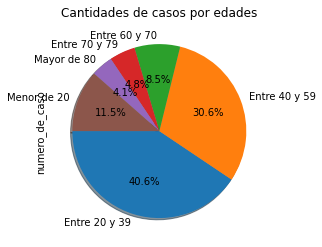

In [93]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = pd.unique(casos['grupo_etario'])
print(labels)
# df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
# cantidades = casos[['numero_de_caso','grupo_etario']].groupby(['grupo_etario']).agg(['count'])
# print(cantidades['grupo_etario'])
sizes = [150, 300, 450, 100]

cg = casos.groupby(['grupo_etario'])['numero_de_caso'].count()
cg.plot(kind="pie", shadow=True, startangle=180, autopct='%1.1f%%', title='Cantidades de casos por edades')
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

In [100]:
#Cantidad de infectados agrupados por fecha

#La agrupación por fecha no está ordenada => ordenarla y generar el gráfico
#infectadosCount
#infectadosCount.sort_values(by=['fecha_clasificacion'])
casos['fecha_clasificacion'] = pd.to_datetime(casos['fecha_clasificacion'], format='%Y/%m/%d')

AttributeError: 'DataFrame' object has no attribute 'to_datetime'

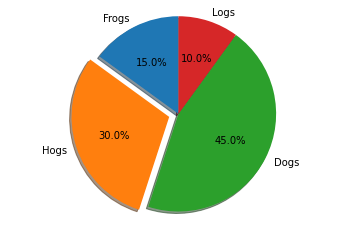

In [90]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [300, 600, 900, 200]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
"""
================
Date tick labels
================

Show how to make date plots in matplotlib using date tick locators and
formatters.  See major_minor_demo1.py for more information on
controlling major and minor ticks

All matplotlib date plotting is done by converting date instances into
days since the 0001-01-01 UTC.  The conversion, tick locating and
formatting is done behind the scenes so this is most transparent to
you.  The dates module provides several converter functions date2num
and num2date

"""
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# load a numpy record array from yahoo csv data with fields date,
# open, close, volume, adj_close from the mpl-data/example directory.
# The record array stores python datetime.date as an object array in
# the date column
datafile = cbook.get_sample_data('goog.npy')
try:
    # Python3 cannot load python2 .npy files with datetime(object) arrays
    # unless the encoding is set to bytes. However this option was
    # not added until numpy 1.10 so this example will only work with
    # python 2 or with numpy 1.10 and later.
    r = np.load(datafile, encoding='bytes').view(np.recarray)
except TypeError:
    r = np.load(datafile).view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)


# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(r.date.min().year, 1, 1)
datemax = datetime.date(r.date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()